# analyse data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def plot_reward(data: pd.DataFrame) -> None:
	for index, row in data[['rewards', 'sr']].iterrows():
		rew = row['rewards']
		sr = row['sr']
		plt.plot(rew, alpha=0.7)
	plt.legend()
	plt.ylabel('normalized cumulative reward')
	plt.xlabel('episodes')
	plt.title('CartPole')
	plt.suptitle('Comparison of learning converge speeds with success rate > 90%')
	plt.show()

# Cartpole

In [8]:
data = pd.read_csv('CartPole_v1_log.csv', delimiter=';')
data['rewards'] = data['rewards'].map(lambda x : np.array(list(map(float, x.split(',')))))
#data = data.where(data['sr']>0.90).dropna()
data

,path,env,llm,llm_param,algo,algo_param,reward_function,rewards,mean_reward,std_reward,sr
0,data/model/CartPole-v1_dbe44a7c-a635-4b10-b2ea...,CartPole-v1,falcon3:10b,{'seed': 253600},PPO,"{'policy': 'MlpPolicy', 'verbose': 0, 'device'...","def reward_func(observations:np.ndarray, is_su...","[0.0043700114, 0.0013151622, 0.0069074905, 0.0...",0.032922,0.044015,0.00
1,data/model/CartPole-v1_dbe44a7c-a635-4b10-b2ea...,CartPole-v1,falcon3:10b,{'seed': 253600},PPO,"{'policy': 'MlpPolicy', 'verbose': 0, 'device'...","def reward_func(observations:np.ndarray, is_su...","[0.0108839385, 0.04378567, 0.013773203, 0.0176...",0.037456,0.039664,0.00
2,data/model/CartPole-v1_9f0099fc-9bef-487c-bd6f...,CartPole-v1,falcon3:10b,{'seed': 253600},PPO,"{'policy': 'MlpPolicy', 'verbose': 0, 'device'...","def reward_func(observations:np.ndarray, is_su...","[0.00800527, 0.00855322, 0.003129609, -0.00067...",0.033994,0.045386,0.00
3,data/model/CartPole-v1_9f0099fc-9bef-487c-bd6f...,CartPole-v1,falcon3:10b,{'seed': 253600},PPO,"{'policy': 'MlpPolicy', 'verbose': 0, 'device'...","def reward_func(observations: np.ndarray, is_s...","[0.0025003345, 0.016727054, 0.003584093, -0.00...",0.032032,0.043762,0.00
4,data/model/CartPole-v1_bffa4ab8-bdb8-4b08-88c2...,CartPole-v1,falcon3:10b,{'seed': 253600},PPO,"{'policy': 'MlpPolicy', 'verbose': 0, 'device'...","def reward_func(observations:np.ndarray, is_su...","[0.005475411, 0.0014241639, 0.02675911, 0.0130...",0.033671,0.043868,0.00
5,data/model/CartPole-v1_bffa4ab8-bdb8-4b08-88c2...,CartPole-v1,falcon3:10b,{'seed': 253600},PPO,"{'policy': 'MlpPolicy', 'verbose': 0, 'device'...","def reward_func(observations:np.ndarray, is_su...","[0.0035062379, 0.015222958, 0.008872275, 0.001...",0.035326,0.038819,0.00
6,data/model/CartPole-v1_ade2e356-e968-4866-854e...,CartPole-v1,falcon3:10b,{'seed': 253600},PPO,"{'policy': 'MlpPolicy', 'verbose': 0, 'device'...","def reward_func(observations:np.ndarray, is_su...","[0.0073761125, 0.029831793, 0.006188222, 0.026...",0.036736,0.044291,0.00
7,data/model/CartPole-v1_ade2e356-e968-4866-854e...,CartPole-v1,falcon3:10b,{'seed': 253600},PPO,"{'policy': 'MlpPolicy', 'verbose': 0, 'device'...","def reward_func(observations: np.ndarray, is_s...","[0.017733887, 0.06482232, 0.058182765, 0.00541...",0.037722,0.034965,0.00
8,data/model/CartPole-v1_c5c3d0e0-4b18-4615-927e...,CartPole-v1,falcon3:10b,{'seed': 253600},PPO,"{'policy': 'MlpPolicy', 'verbose': 0, 'device'...","def reward_func(observations:np.ndarray, is_su...","[0.0024546743, 0.016002728, 0.0045459117, -0.0...",0.034221,0.044536,0.01
9,data/model/CartPole-v1_5b0a2ab5-3dff-4eb5-a223...,CartPole-v1,falcon3:10b,{'seed': 628715},PPO,"{'policy': 'MlpPolicy', 'verbose': 0, 'device'...","def reward_func(observations:np.ndarray, is_su...","[-0.056112133, -0.05570216, -0.06505353, -0.05...",-0.063250,0.010708,0.21


/tmp/ipykernel_103955/2345997030.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


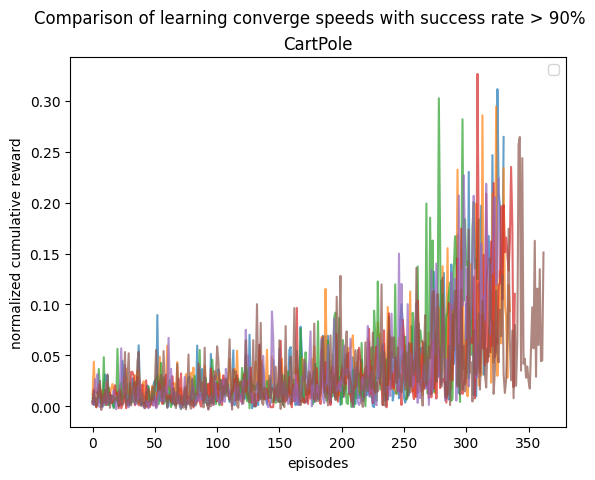

In [12]:
plot_reward(data)

In [5]:
data.loc[47]

env                                                      CartPole-v1
llm                                                    qwen2.5-coder
reward_function    def reward_func(observations:np.ndarray, is_su...
rewards            [0.00496324016524664, -0.0036319687486247184, ...
mean_reward                                                 0.037176
std_reward                                                   0.06632
SR                                                              0.92
Name: 47, dtype: object

In [6]:
print(data.loc[47].reward_function)

def reward_func(observations:np.ndarray, is_success:bool, is_failure:bool) -> float:    
    x, x_dot, theta, theta_dot = observations
    
    if is_success:
        return 10.0
    elif is_failure:
        return -10.0
    else:
        # Reward based on how close to vertical the pole is and how stable it is
        proximity_to_vertical = np.cos(theta)
        stability_factor = np.exp(-abs(theta_dot))
        
        reward = proximity_to_vertical * stability_factor
        
        return reward


# Lunar Lander

In [ ]:
data = pd.read_csv('log/LunarLander_v3_log.csv', delimiter=';')
data['rewards'] = data['rewards'].map(lambda x : np.array(list(map(float, x.split(',')))))
data = data.where(data['SR']>0.2).dropna()
data

In [ ]:
plot_reward(data)

In [ ]:
data.loc[37]

In [ ]:
print(data.loc[37].reward_function)

# Hopper

In [ ]:
data = pd.read_csv('log/Hopper_v5_log.csv', delimiter=';')
data['rewards'] = data['rewards'].map(lambda x : np.array(list(map(float, x.split(',')))))
data

In [ ]:
print(data.iloc[1].reward_function)

In [ ]:
for idx, rew in enumerate(data.iloc['rewards']):
	plt.plot(rew, label=idx, alpha=0.7)
	plt.legend()	